<a href="https://colab.research.google.com/github/GenoKiller777/PythonVarios/blob/main/ReduccionDimensionalidad_PCA_CasoWines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving wine-segments.csv to wine-segments.csv
User uploaded file "wine-segments.csv" with length 544 bytes


In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [130]:
wines = pd.read_csv('wine-data.csv')

In [106]:
wines.head(3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [5]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
wines.mean(axis=0)

----------------------
Media de cada variable
----------------------


Alcohol                  13.000618
Malic_Acid                2.336348
Ash                       2.366517
Ash_Alcanity             19.494944
Magnesium                99.741573
Total_Phenols             2.295112
Flavanoids                2.029270
Nonflavanoid_Phenols      0.361854
Proanthocyanins           1.590899
Color_Intensity           5.058090
Hue                       0.957449
OD280                     2.611685
Proline                 746.893258
dtype: float64

In [7]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
wines.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


Alcohol                     0.659062
Malic_Acid                  1.248015
Ash                         0.075265
Ash_Alcanity               11.152686
Magnesium                 203.989335
Total_Phenols               0.391690
Flavanoids                  0.997719
Nonflavanoid_Phenols        0.015489
Proanthocyanins             0.327595
Color_Intensity             5.374449
Hue                         0.052245
OD280                       0.504086
Proline                 99166.717355
dtype: float64

## **1.** Haga un análisis de componentes principales en donde se distinga el porcentaje de varianza acumulada que logra explicar cada componente.


### Escalamiento de datos

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
scaler.fit(wines)
wines_scaled = scaler.transform(wines)

In [10]:
pd.DataFrame(wines_scaled, columns = wines.columns)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


### Análisis de Dimensionalidad

### Principal Analyst Components

In [23]:
from sklearn.decomposition import PCA

pca = PCA().fit(wines_scaled)

In [24]:
componentes = pd.DataFrame(pca.components_, columns=wines.columns, index = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6', 'PC7', 'PC8','PC9', 'PC10', 'PC11', 'PC12','PC13'])
componentes.head(3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
PC1,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
PC2,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903
PC3,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746


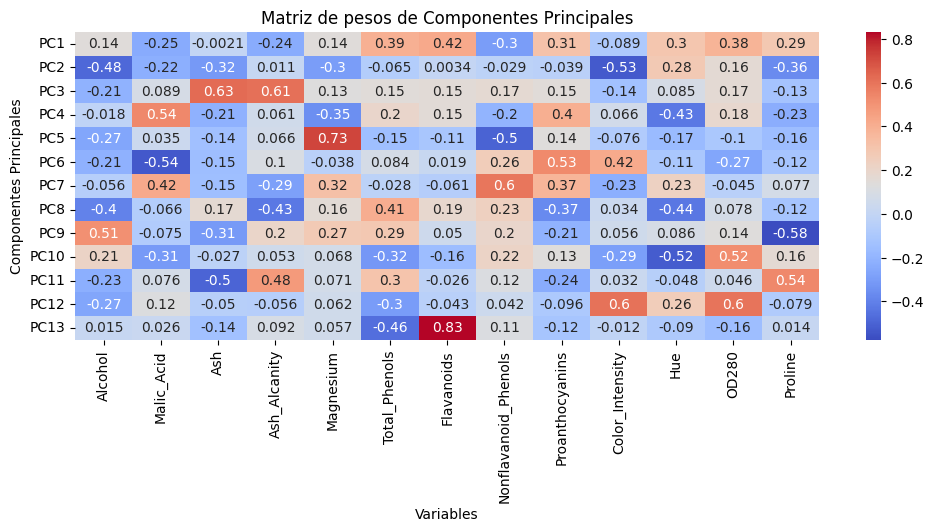

In [13]:
plt.figure(figsize = (12,4))
sns.heatmap(componentes, annot = True, cmap = 'coolwarm')

plt.title("Matriz de pesos de Componentes Principales")

plt.xlabel("Variables")
plt.ylabel("Componentes Principales")
plt.show();

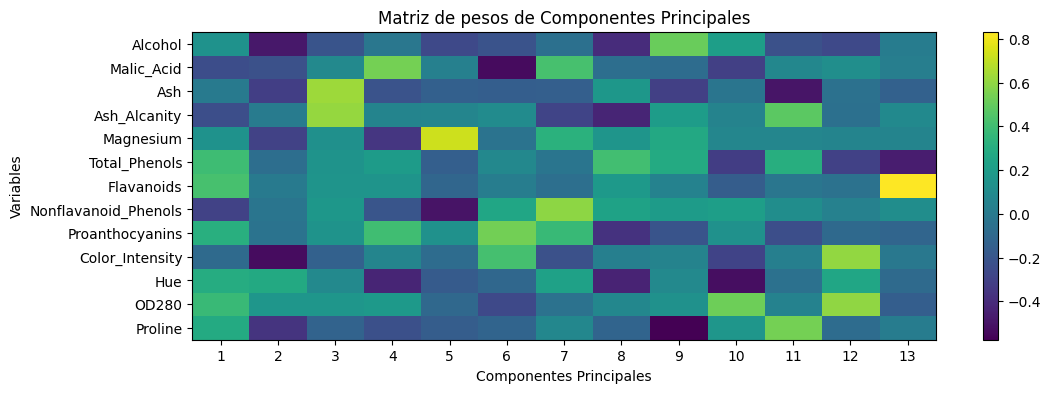

In [14]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
componentes = pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(wines.columns)), wines.columns)
plt.xticks(range(len(wines.columns)), np.arange(pca.n_components_) + 1)
plt.grid(False)

plt.title("Matriz de pesos de Componentes Principales")
plt.xlabel("Componentes Principales")
plt.ylabel("Variables")
plt.colorbar()
plt.show();

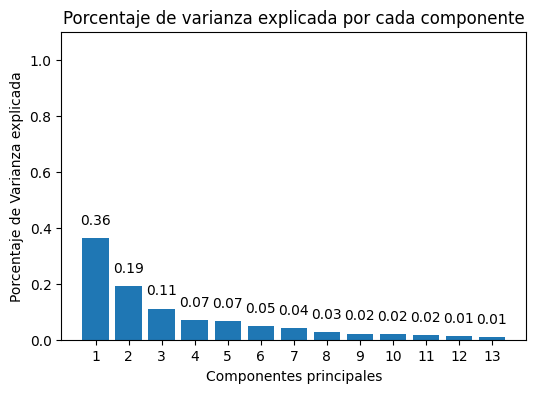

In [15]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(wines.columns)) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componentes principales')
ax.set_ylabel('Porcentaje de Varianza explicada')
plt.show();

## **2.** Seleccione la cantidad de dimensiones del nuevo espacio. Justifique su respuesta.

**R.-** _Según los gráficos, el valor óptimo del PCA para reducir su dimensionalidad se debe usar un total de **6** Componentes, ya que con **6** componentes se explica el **85%** de varianza acumulada del espacio dimencional creado por las 13 Features._


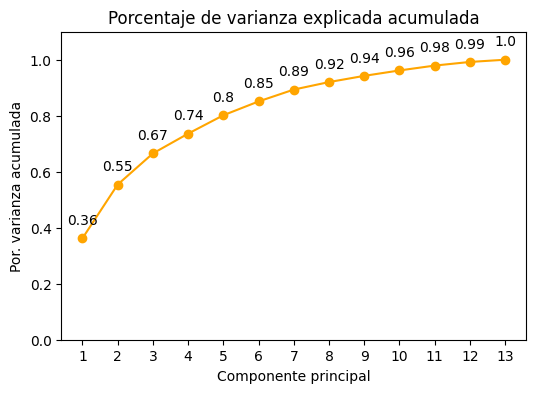

In [16]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(wines.columns)) + 1,
    prop_varianza_acum,
    marker = 'o',
    color = 'orange'
)

for x, y in zip(np.arange(len(wines.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')
plt.show();

## **3.** Realice la reducción al nuevo espacio dimensional.


### Reducción de dimensionalidad

In [28]:
pca_red = PCA(n_components=6).fit(wines_scaled)

In [30]:
componentes_reduc = pd.DataFrame(pca_red.components_, columns=wines.columns, index = ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6'])
componentes_reduc

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
PCA1,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
PCA2,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903
PCA3,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746
PCA4,-0.017856,0.536890,-0.214176,0.060859,-0.351797,0.198068,0.152295,-0.203301,0.399057,0.065926,-0.427771,0.184121,-0.232071
PCA5,-0.265664,0.035214,-0.143025,0.066103,0.727049,-0.149318,-0.109026,-0.500703,0.136860,-0.076437,-0.173615,-0.101161,-0.157869
PCA6,-0.213539,-0.536814,-0.154475,0.100825,-0.038144,0.084122,0.018920,0.258594,0.533795,0.418644,-0.105983,-0.265851,-0.119726


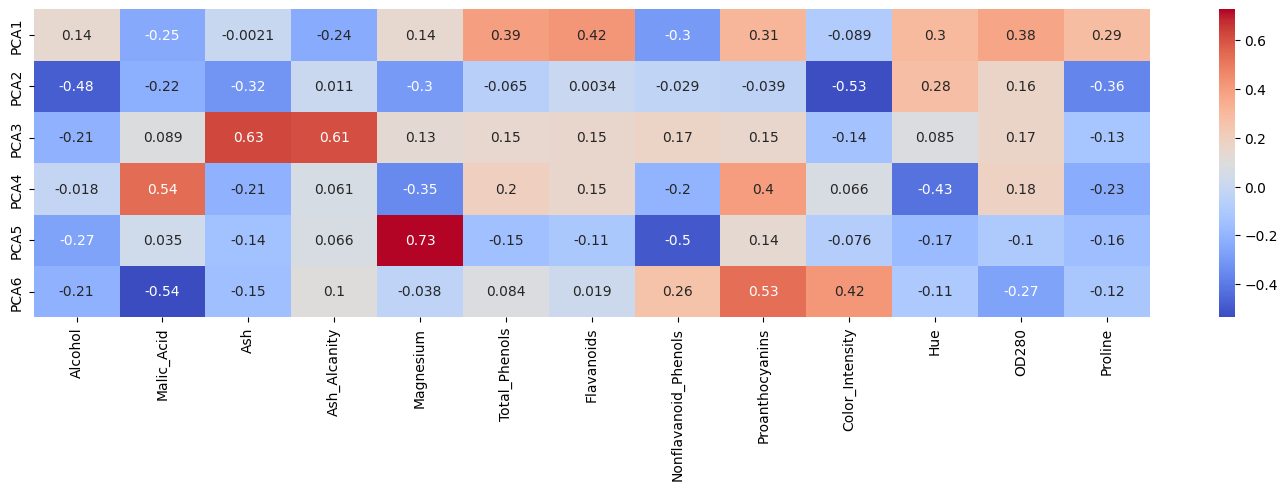

In [31]:
plt.figure(figsize=(18,4))
sns.heatmap(componentes_reduc, annot=True, cmap='coolwarm')
plt.show()

In [33]:
pca_reduce = pca_red.transform(wines_scaled)

In [35]:
# Antes de aplicar la reducción de dimensionalidad
wines.shape

(178, 13)

In [36]:
# Después de aplicar la reducción de dimensionalidad
pca_reduce.shape

(178, 6)

In [37]:
pd.DataFrame(pca_reduce,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])

,PC1,PC2,PC3,PC4,PC5,PC6
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520
...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783


## **4.** Haga un gráfico de los resultados obtenidos con el nuevo espacio dimensional. ¿Se aprecian clusters?.

**R.-** _Según los gráficos se aprecian agrupamientos, que aun no se pueden especificar por la no aplicación del modelo No Supervidado._


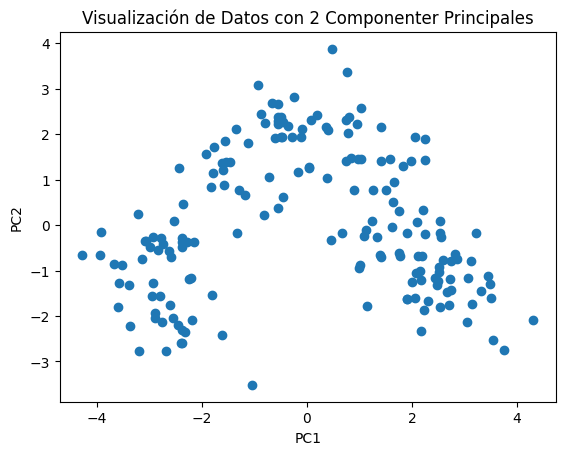

In [38]:
# Visualización de los datos con 2 Componentes
plt.scatter(pca_reduce[:,0],pca_reduce[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualización de Datos con 2 Componenter Principales')
plt.show()

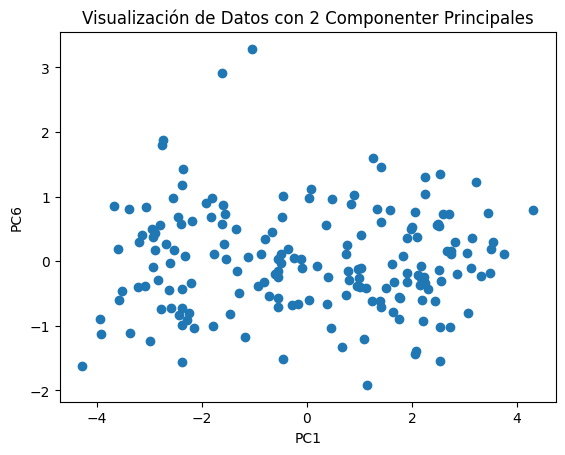

In [54]:
# Visualización de los datos con 2 Componentes
plt.scatter(pca_reduce[:,0],pca_reduce[:,5])
plt.xlabel('PC1')
plt.ylabel('PC6')
plt.title('Visualización de Datos con 2 Componenter Principales')
plt.show()

## **5.** Haga una clusterización con el algoritmo de su predilección. ¿Cuál es la cantidad de clusters seleccionada?.

**R.-** _Según los gráficos el valor óptimo de K es de **3**_.


In [40]:
from sklearn.cluster import KMeans

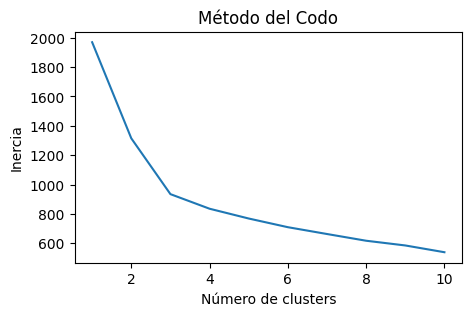

In [43]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(5,3))
# Método del Codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(pca_reduce)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()

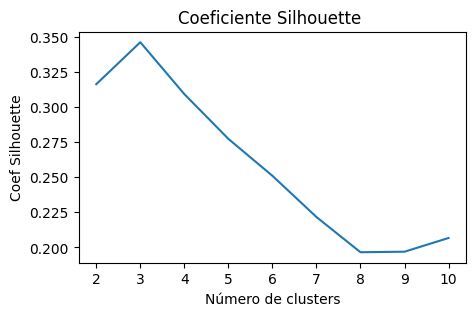

In [44]:
plt.figure(figsize=(5,3))

from sklearn.metrics import silhouette_samples, silhouette_score

savg = []
for i in range(2,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 33)
  kmeans.fit(pca_reduce)
  silhouette_avg = silhouette_score(pca_reduce, kmeans.labels_)
  savg.append(silhouette_avg)

plt.plot(range(2, 11),savg)
plt.title('Coeficiente Silhouette ')
plt.xlabel('Número de clusters')
plt.ylabel('Coef Silhouette')
plt.show()

In [131]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(pca_reduce)
label = kmeans.labels_

## **6.** Marque el set de datos inicial con el número de cluster.


In [132]:
label = pd.DataFrame(label)
label.columns = ['label']

In [133]:
label['label'].value_counts()

1    66
2    61
0    51
Name: label, dtype: int64

In [134]:
condiciones = [
    (label['label'] == 0),
    (label['label'] == 1),
    (label['label'] == 2),
    ]

valores = ['3', '2', '1']

label['label'] = np.select(condiciones, valores)

In [135]:
label['label'].value_counts()

2    66
1    61
3    51
Name: label, dtype: int64

In [136]:
label.rename(columns = {'label':'Cultivar_Kmeans'}, inplace = True)

In [137]:
wines = wines.join(label)

In [138]:
wines_segment = pd.read_csv('/content/wine-segments.csv')

In [139]:
wines = wines.join(wines_segment)

## **7.** Ahora compare el valor real de los segmentos de vinos con el resultado de la clusterización.


In [141]:
from sklearn import metrics
print(f'''El rand ajustado es una función que mide la similitud de las dos asignaciones,
ignorando las permutaciones y con normalización aleatoria, el ejercicio nos da un valor de
{round(metrics.adjusted_rand_score(wines['Cultivar'], wines['Cultivar_Kmeans'])*100,3)} % por lo cual podriamos afirmar que el modelo
aprendio aproximadamente bien las categorias.''')

El rand ajustado es una función que mide la similitud de las dos asignaciones, 
ignorando las permutaciones y con normalización aleatoria, el ejercicio nos da un valor de
91.488 % por lo cual podriamos afirmar que el modelo 
aprendio aproximadamente bien las categorias.


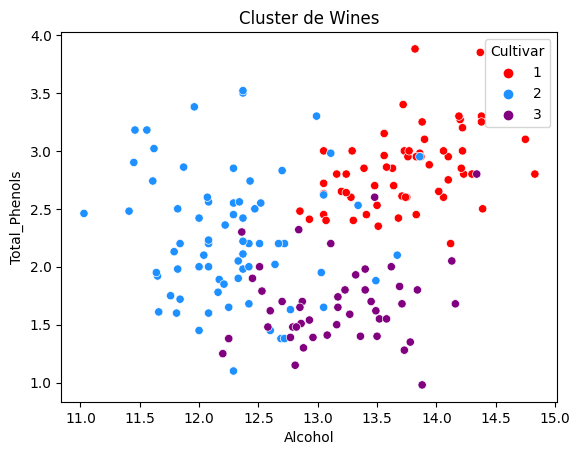

In [142]:
sns.scatterplot(data= wines ,
                x="Alcohol",
                y="Total_Phenols",
                hue ='Cultivar',
                palette=['red','dodgerblue','purple'],
                legend='full')

plt.title('Cluster de Wines')
plt.show()

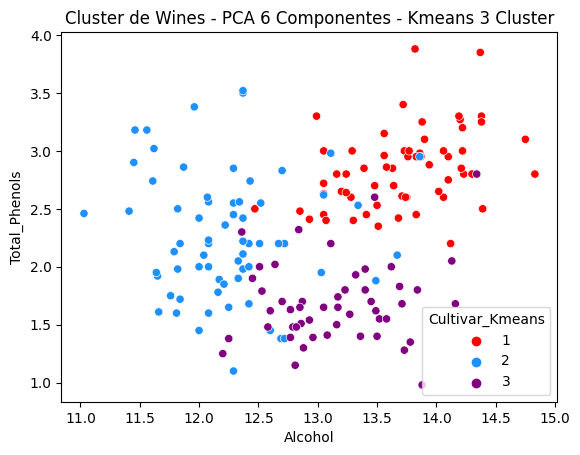

In [149]:
sns.scatterplot(data= wines ,
                x="Alcohol",
                y="Total_Phenols",
                hue ='Cultivar_Kmeans',
                palette=['red','dodgerblue','purple'],
                legend='full')

plt.title('Cluster de Wines - PCA 6 Componentes - Kmeans 3 Cluster')
plt.show()

## **8.** Elabore sus conclusiones.

**R.-** _Según la aplicación de la reducción de dimensionalidad a través del PCA, para ser usado por Kmeans generaliza bien pero aun asi erra en algunas etiquetas, talvez se deberia dejar otra componente o hacer Tunning al Kmeans para encontrar mejores hiperparametros, pero en general el modelo aprende aproximadamente bien las etiquetas, lo cual puede ser una excelente herramienta tanto la reducción como el agrupamiento por Kmeans para asignar segmentos agrupados y ser usados para solucionar problemas de negocio._

### Porcentaje de clases reales y por modelo.

In [148]:
wines['Cultivar'].value_counts()/sum(wines['Cultivar'].value_counts())*100

2    39.887640
1    33.146067
3    26.966292
Name: Cultivar, dtype: float64

In [147]:
wines['Cultivar_Kmeans'].value_counts()/sum(wines['Cultivar'].value_counts())*100

2    37.078652
1    34.269663
3    28.651685
Name: Cultivar_Kmeans, dtype: float64